In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import bioframe 
import pandas as pd
import numpy as np 
import os
import json
from io import StringIO
import random

In [2]:
orientation = "same"

In [3]:
df_0_10 = pd.read_csv(f"./0-10pads_{orientation}.csv", index_col="index")
df_0_10_onlySCD = df_0_10.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_10_20 = pd.read_csv(f"./10-20pads_{orientation}.csv", index_col="index")
df_10_20_onlySCD = df_10_20.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_20_30 = pd.read_csv(f"./20-30pads_{orientation}.csv", index_col="index")
df_20_30_onlySCD = df_20_30.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_30_40 = pd.read_csv(f"./30-40pads_{orientation}.csv", index_col="index")
df_30_40_onlySCD = df_30_40.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_40_50 = pd.read_csv(f"./40-50pads_{orientation}.csv", index_col="index")
df_40_50_onlySCD = df_40_50.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_50_60 = pd.read_csv(f"./50-60pads_{orientation}.csv", index_col="index")
df_50_60_onlySCD = df_50_60.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

In [4]:
df_same = pd.concat([df_0_10_onlySCD, df_10_20_onlySCD, df_20_30_onlySCD, df_30_40_onlySCD, df_40_50_onlySCD, df_50_60_onlySCD], axis=1)

In [5]:
df_same

,Pad_0_b0_SCD,Pad_0_b1_SCD,Pad_0_b2_SCD,Pad_0_b3_SCD,Pad_0_b4_SCD,Pad_0_b5_SCD,Pad_0_b6_SCD,Pad_0_b7_SCD,Pad_0_b8_SCD,Pad_0_b9_SCD,...,Pad_59_b0_SCD,Pad_59_b1_SCD,Pad_59_b2_SCD,Pad_59_b3_SCD,Pad_59_b4_SCD,Pad_59_b5_SCD,Pad_59_b6_SCD,Pad_59_b7_SCD,Pad_59_b8_SCD,Pad_59_b9_SCD
index,,,,,,,,,,,,,,,,,,,,,
0,14.234,13.660,18.380,23.530,23.770,22.50,19.340,24.60,13.650,24.610,...,32.06,36.600,31.660,40.840,40.840,40.12,35.400,47.20,36.800,39.780
1,14.300,13.660,18.220,21.840,23.110,18.66,19.110,24.19,14.270,24.270,...,28.88,28.900,25.530,31.700,32.250,37.06,30.470,43.38,33.560,29.120
2,15.290,14.820,23.550,28.880,28.060,25.81,23.230,33.28,18.640,28.880,...,28.88,32.660,29.500,35.060,34.400,37.06,32.000,47.10,34.940,30.830
3,13.086,10.820,20.470,22.780,24.360,18.58,17.560,24.11,10.500,24.610,...,28.92,31.160,29.580,36.800,33.300,37.06,31.580,47.10,35.000,30.940
4,13.690,10.734,17.230,20.450,19.660,16.64,16.600,19.31,9.880,20.640,...,28.88,28.360,27.390,31.530,32.120,37.06,30.140,45.56,34.400,28.970
5,8.370,8.840,12.695,14.555,11.700,16.61,13.125,16.31,9.360,11.610,...,26.58,27.030,24.300,30.560,30.300,37.06,28.940,41.20,30.200,28.880
6,7.610,8.836,14.800,13.160,13.445,16.60,13.760,16.45,9.270,18.390,...,28.92,32.700,30.440,37.500,34.900,37.06,32.000,47.10,35.000,31.400
7,10.914,10.734,18.270,19.470,21.750,16.64,16.360,19.31,9.300,22.270,...,28.88,28.080,27.120,32.500,31.940,37.06,30.110,46.44,34.620,29.110
8,10.760,10.450,17.380,20.530,18.980,18.53,16.670,19.83,9.420,20.950,...,28.88,29.810,27.160,32.100,32.280,37.06,30.580,46.30,33.940,29.190


In [ ]:
# df_to_save = pd.concat([df_0_10, df_10_20_onlySCD, df_20_30_onlySCD, df_30_40_onlySCD, df_40_50_onlySCD, df_50_60_onlySCD], axis=1)
# df_to_save.to_csv("./DIVERGENT_60pads.csv", index=False)

In [6]:
nr_bg = 10

In [7]:
flanks = int(df_same.shape[1] / nr_bg)

In [8]:
flanks

60

In [9]:
Ave_Strong = {}
Ave_Weak = {}

In [10]:
for i in range(nr_bg):
    Ave_Strong[f"B{i}"] = []
    Ave_Weak[f"B{i}"] = []

In [11]:
for f in range(flanks):
    for b in range(nr_bg):
        Ave_Strong[f"B{b}"].append(df_same[f"Pad_{f}_b{b}_SCD"][:20].mean(axis=0))
        Ave_Weak[f"B{b}"].append(df_same[f"Pad_{f}_b{b}_SCD"][20:].mean(axis=0))

In [12]:
Ave_Strong["B0"][0]     # pad = 0, background seq = 1

13.40595

In [13]:
strong_colors_10 = ["aquamarine", "turquoise", "lightseagreen", "paleturquoise", "aqua", 
                 "darkturquoise", "deepskyblue", "teal", "lightcyan", "skyblue"]
weak_colors_10 = ["lightpink", "pink", "palevioletred", "hotpink", "orchid", 
              "fuchsia", "magenta", "violet", "plum", "deeppink"]

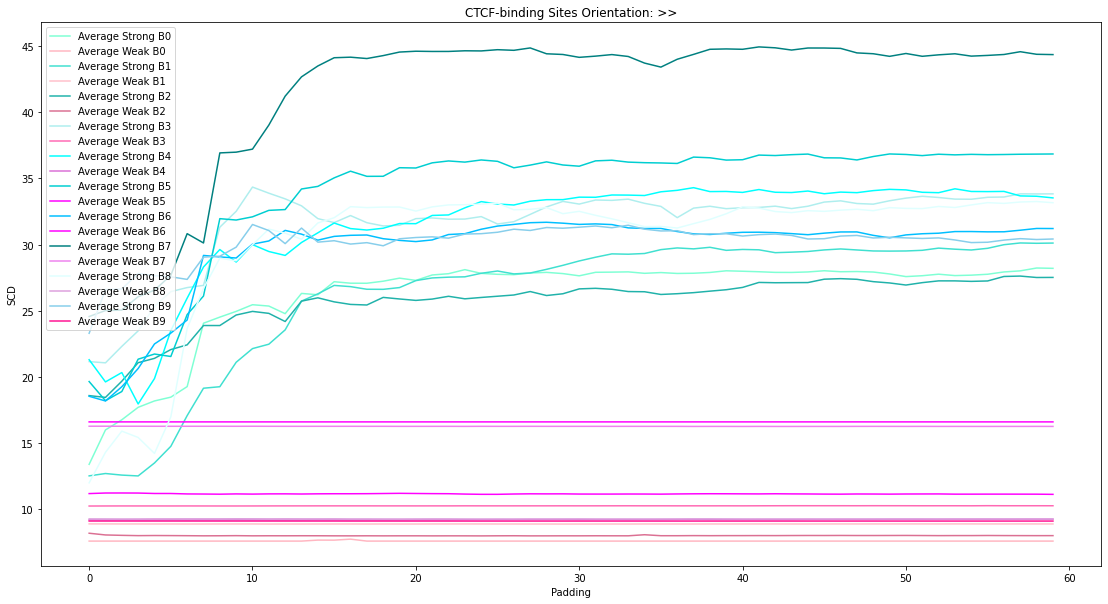

In [14]:
x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(19, 10))

for b in range(nr_bg):
    ax.plot(x, Ave_Strong[f"B{b}"], label="Average Strong " + f"B{b}", color=strong_colors_10[b])
    ax.plot(x, Ave_Weak[f"B{b}"], label="Average Weak " + f"B{b}", color=weak_colors_10[b])

ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites Orientation: >>")
ax.legend()
# plt.savefig("./DIVERGENT_Orientation_60paddings_backgrounds.png")
plt.show()

In [15]:
Ave_AllStrong = np.zeros(flanks)
Ave_AllWeak = np.zeros(flanks)
    
    
for b in range(nr_bg):
    Ave_AllStrong += Ave_Strong[f"B{b}"]
    Ave_AllWeak += Ave_Weak[f"B{b}"]

Ave_AllStrong = Ave_AllStrong / nr_bg
Ave_AllWeak = Ave_AllWeak / nr_bg

In [16]:
Ave_AllStrong

array([18.50754 , 19.02059 , 19.746785, 20.40625 , 21.098205, 22.23602 ,
       24.23578 , 26.348385, 28.464595, 28.83282 , 29.773175, 30.009345,
       30.10107 , 31.014325, 31.1333  , 31.51425 , 31.6068  , 31.4741  ,
       31.51035 , 31.70735 , 31.7557  , 31.9803  , 32.0714  , 32.175   ,
       32.3058  , 32.29235 , 32.2186  , 32.39335 , 32.4821  , 32.4716  ,
       32.5086  , 32.6296  , 32.63555 , 32.5615  , 32.4027  , 32.3776  ,
       32.33745 , 32.50315 , 32.5835  , 32.6039  , 32.6666  , 32.7769  ,
       32.7017  , 32.6494  , 32.6873  , 32.72505 , 32.7852  , 32.7119  ,
       32.65695 , 32.6766  , 32.6871  , 32.68565 , 32.76065 , 32.7511  ,
       32.7095  , 32.76625 , 32.86755 , 32.93825 , 32.93525 , 32.91615 ])

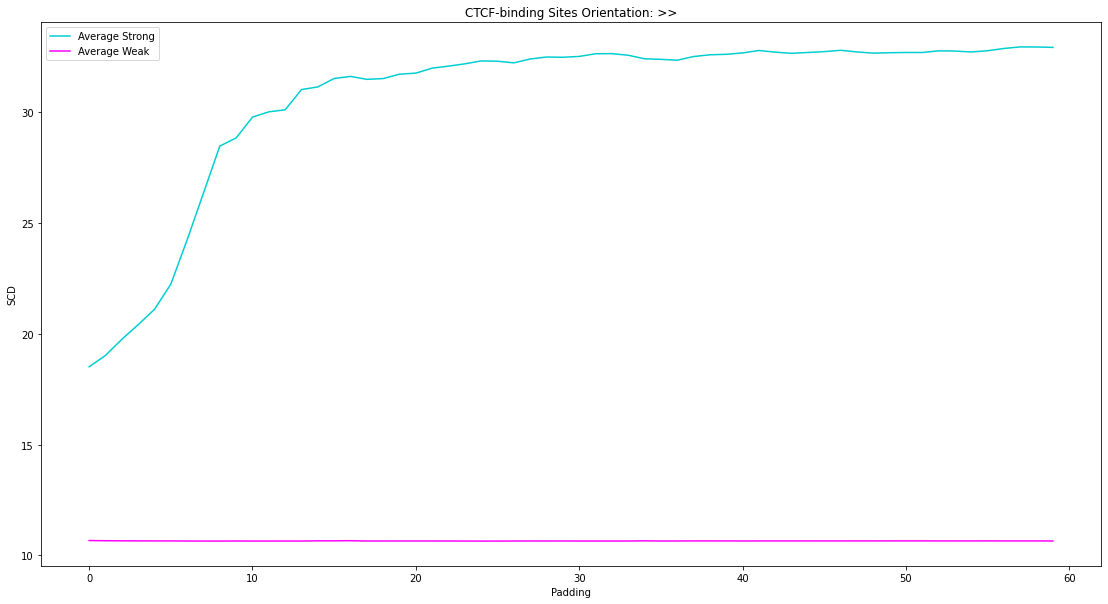

In [17]:
x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(19, 10))

ax.plot(x, Ave_AllStrong, label="Average Strong", color="darkturquoise")
ax.plot(x, Ave_AllWeak, label="Average Weak", color="magenta")

ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites Orientation: >>")
ax.legend()
# plt.savefig("./DIVERGENT_Orientation_60paddings_averaged.png")
plt.show()

In [18]:
List_of_40 = [np.zeros(60) for i in range(40)]

for b in range(nr_bg):
    for f in range(flanks):
        for k in range(40):
            List_of_40[k][f] += df_same[f"Pad_{f}_b{b}_SCD"][k]

for k in range(40):
    List_of_40[k] = List_of_40[k] / nr_bg

In [19]:
List_of_40[0]

array([19.8274, 21.178 , 22.192 , 24.512 , 24.912 , 25.101 , 26.365 ,
       27.797 , 32.333 , 33.528 , 34.353 , 35.08  , 35.003 , 36.155 ,
       36.532 , 36.627 , 36.346 , 36.583 , 36.059 , 36.46  , 36.289 ,
       36.347 , 36.435 , 37.384 , 37.296 , 37.465 , 37.598 , 37.626 ,
       38.321 , 38.334 , 38.31  , 38.142 , 38.345 , 38.272 , 38.112 ,
       38.109 , 38.064 , 37.927 , 38.045 , 38.388 , 38.367 , 38.642 ,
       38.581 , 38.637 , 38.237 , 38.02  , 38.084 , 38.029 , 38.016 ,
       38.247 , 38.234 , 38.19  , 38.459 , 38.346 , 38.249 , 37.79  ,
       37.916 , 37.985 , 37.968 , 38.13  ])

In [ ]:
# df[f"Pad_0_b0_SCD"]

In [ ]:
# df["Pad_0_b0_SCD"]

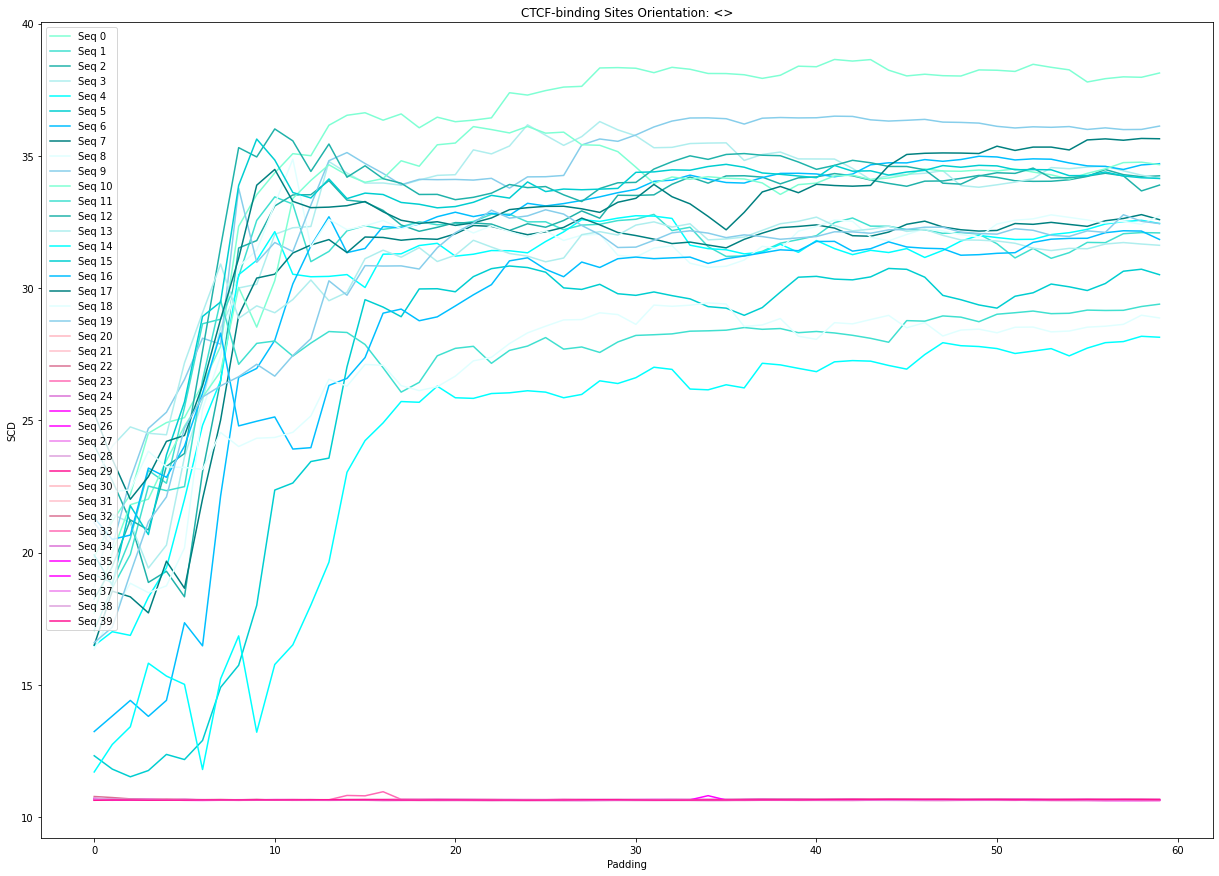

In [20]:
strong_colors_40 = ["aquamarine", "turquoise", "lightseagreen", "paleturquoise", "aqua", 
                 "darkturquoise", "deepskyblue", "teal", "lightcyan", "skyblue",
                "aquamarine", "turquoise", "lightseagreen", "paleturquoise", "aqua", 
                 "darkturquoise", "deepskyblue", "teal", "lightcyan", "skyblue"]

weak_colors_40 = ["lightpink", "pink", "palevioletred", "hotpink", "orchid", 
              "fuchsia", "magenta", "violet", "plum", "deeppink",
              "lightpink", "pink", "palevioletred", "hotpink", "orchid", 
              "fuchsia", "magenta", "violet", "plum", "deeppink"]

colors_all_40 = strong_colors_40 + weak_colors_40

x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(21, 15))

for s in range(40):
    ax.plot(x, List_of_40[s], label=f"Seq {s}", color=colors_all_40[s])

ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites Orientation: <>")
ax.legend()
# plt.savefig("./DIVERGENT_Orientation_60paddings_sequences.png")
plt.show()


In [ ]:
########

In [21]:
orientation = "convergent"

In [22]:
df_0_10 = pd.read_csv(f"./0-10pads_{orientation}.csv", index_col="index")
df_0_10_onlySCD = df_0_10.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_10_20 = pd.read_csv(f"./10-20pads_{orientation}.csv", index_col="index")
df_10_20_onlySCD = df_10_20.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_20_30 = pd.read_csv(f"./20-30pads_{orientation}.csv", index_col="index")
df_20_30_onlySCD = df_20_30.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_30_40 = pd.read_csv(f"./30-40pads_{orientation}.csv", index_col="index")
df_30_40_onlySCD = df_30_40.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_40_50 = pd.read_csv(f"./40-50pads_{orientation}.csv", index_col="index")
df_40_50_onlySCD = df_40_50.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_50_60 = pd.read_csv(f"./50-60pads_{orientation}.csv", index_col="index")
df_50_60_onlySCD = df_50_60.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

In [23]:
df_convergent = pd.concat([df_0_10_onlySCD, df_10_20_onlySCD, df_20_30_onlySCD, df_30_40_onlySCD, df_40_50_onlySCD, df_50_60_onlySCD], axis=1)

In [24]:
Ave_Strong_c = {}
Ave_Weak_c = {}

for i in range(nr_bg):
    Ave_Strong_c[f"B{i}"] = []
    Ave_Weak_c[f"B{i}"] = []

for f in range(flanks):
    for b in range(nr_bg):
        Ave_Strong_c[f"B{b}"].append(df_convergent[f"Pad_{f}_b{b}_SCD"][:20].mean(axis=0))
        Ave_Weak_c[f"B{b}"].append(df_convergent[f"Pad_{f}_b{b}_SCD"][20:].mean(axis=0))

In [25]:
con_strong_colors_10 = ["forestgreen", "limegreen", "darkgreen", "green", "lime", 
                        "seagreen", "mediumseagreen", "springgreen", "mediumspringgreen", "mediumaquamarine"]
con_weak_colors_10 = ["dimgray", "dimgrey", "grey", "gray", "darkgrey", 
                      "darkgray", "silver", "lightgray", "gainsboro", "lightgrey"]

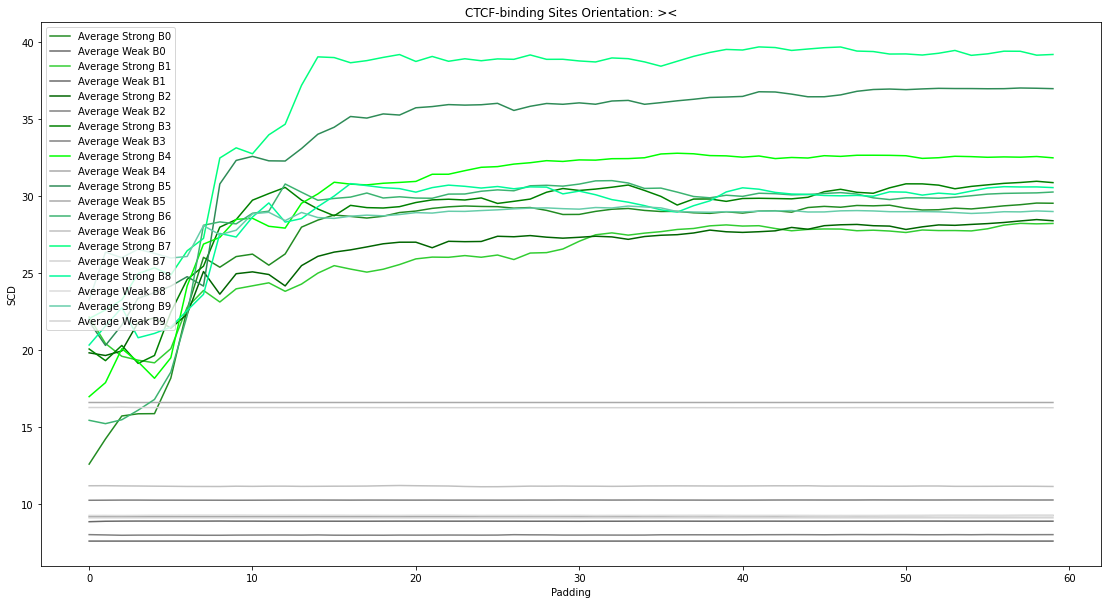

In [26]:
x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(19, 10))

for b in range(nr_bg):
    ax.plot(x, Ave_Strong_c[f"B{b}"], label="Average Strong " + f"B{b}", color=con_strong_colors_10[b])
    ax.plot(x, Ave_Weak_c[f"B{b}"], label="Average Weak " + f"B{b}", color=con_weak_colors_10[b])

ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites Orientation: ><")
ax.legend()
# plt.savefig("./DIVERGENT_Orientation_60paddings_backgrounds.png")
plt.show()

In [32]:
con_Ave_AllStrong = np.zeros(flanks)
con_Ave_AllWeak = np.zeros(flanks)
    
    
for b in range(nr_bg):
    con_Ave_AllStrong += Ave_Strong_c[f"B{b}"]
    con_Ave_AllWeak += Ave_Weak_c[f"B{b}"]

con_Ave_AllStrong = con_Ave_AllStrong / nr_bg
con_Ave_AllWeak = con_Ave_AllWeak / nr_bg

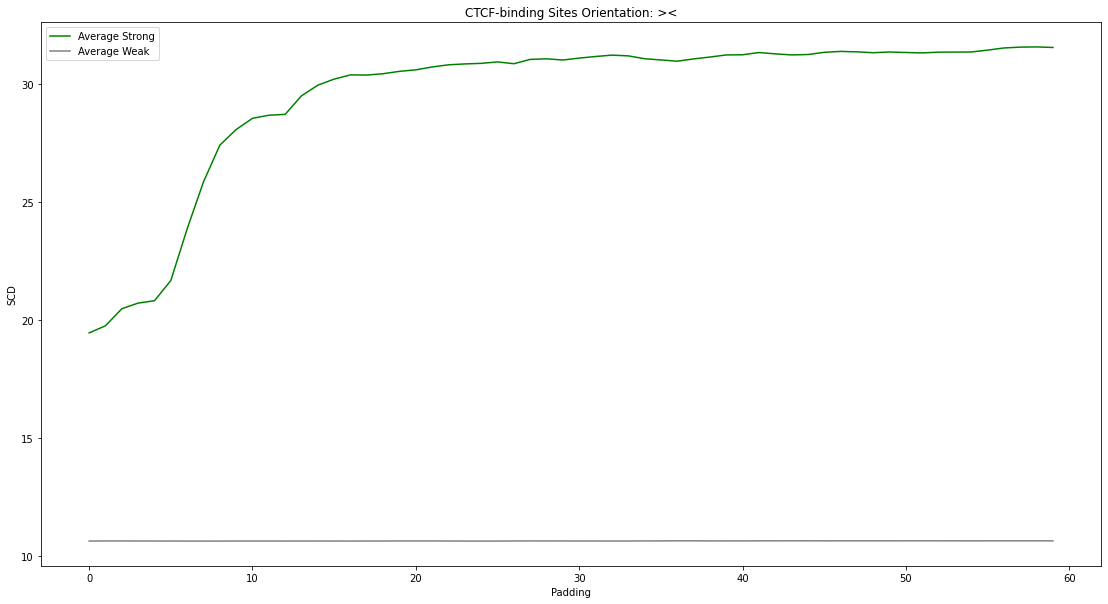

In [33]:
x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(19, 10))

ax.plot(x, con_Ave_AllStrong, label="Average Strong", color="green")
ax.plot(x, con_Ave_AllWeak, label="Average Weak", color="gray")

ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites Orientation: ><")
ax.legend()
# plt.savefig("./DIVERGENT_Orientation_60paddings_averaged.png")
plt.show()

In [34]:
con_List_of_40 = [np.zeros(60) for i in range(40)]

for b in range(nr_bg):
    for f in range(flanks):
        for k in range(40):
            con_List_of_40[k][f] += df_convergent[f"Pad_{f}_b{b}_SCD"][k]

for k in range(40):
    con_List_of_40[k] = con_List_of_40[k] / nr_bg

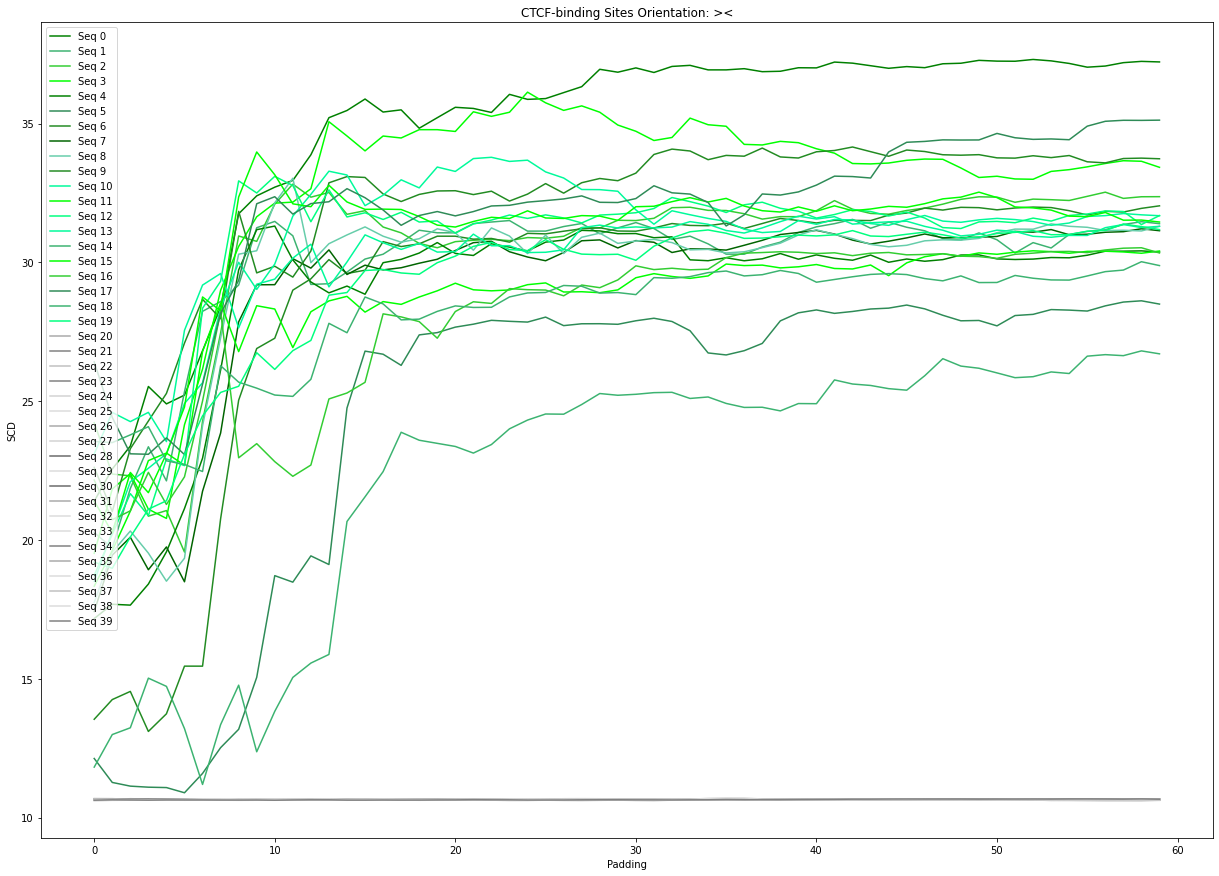

In [36]:
x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(21, 15))

for s in range(40):
    if s < 20:
        ax.plot(x, con_List_of_40[s], label=f"Seq {s}", color=random.choice(con_strong_colors_10))
    else:
        ax.plot(x, con_List_of_40[s], label=f"Seq {s}", color=random.choice(con_weak_colors_10))

ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites Orientation: ><")
ax.legend()
# plt.savefig("./DIVERGENT_Orientation_60paddings_sequences.png")
plt.show()

In [ ]:
###########

In [37]:
orientation = "divergent"

In [38]:
df_0_10 = pd.read_csv(f"./0-10pads_{orientation}.csv", index_col="index")
df_0_10_onlySCD = df_0_10.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_10_20 = pd.read_csv(f"./10-20pads_{orientation}.csv", index_col="index")
df_10_20_onlySCD = df_10_20.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_20_30 = pd.read_csv(f"./20-30pads_{orientation}.csv", index_col="index")
df_20_30_onlySCD = df_20_30.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_30_40 = pd.read_csv(f"./30-40pads_{orientation}.csv", index_col="index")
df_30_40_onlySCD = df_30_40.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_40_50 = pd.read_csv(f"./40-50pads_{orientation}.csv", index_col="index")
df_40_50_onlySCD = df_40_50.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

df_50_60 = pd.read_csv(f"./50-60pads_{orientation}.csv", index_col="index")
df_50_60_onlySCD = df_50_60.drop(["chrom", "start", "end", "strand", "genomic_SCD"], axis=1)

In [39]:
df_divergent = pd.concat([df_0_10_onlySCD, df_10_20_onlySCD, df_20_30_onlySCD, df_30_40_onlySCD, df_40_50_onlySCD, df_50_60_onlySCD], axis=1)

In [40]:
Ave_Strong_d = {}
Ave_Weak_d = {}

for i in range(nr_bg):
    Ave_Strong_d[f"B{i}"] = []
    Ave_Weak_d[f"B{i}"] = []

for f in range(flanks):
    for b in range(nr_bg):
        Ave_Strong_d[f"B{b}"].append(df_divergent[f"Pad_{f}_b{b}_SCD"][:20].mean(axis=0))
        Ave_Weak_d[f"B{b}"].append(df_divergent[f"Pad_{f}_b{b}_SCD"][20:].mean(axis=0))

In [41]:
div_strong_colors_10 = ["salmon", "tomato", "red", "darksalmon", "coral",
                       "orangered", "lightcoral", "sienna", "lightsalmon", "indianred"]
div_weak_colors_10 = ["burlywood", "bisque", "tan", "navajowhite", "papayawhip",
                     "moccasin", "wheat", "oldlace", "cornsilk", "lemonchiffon"]

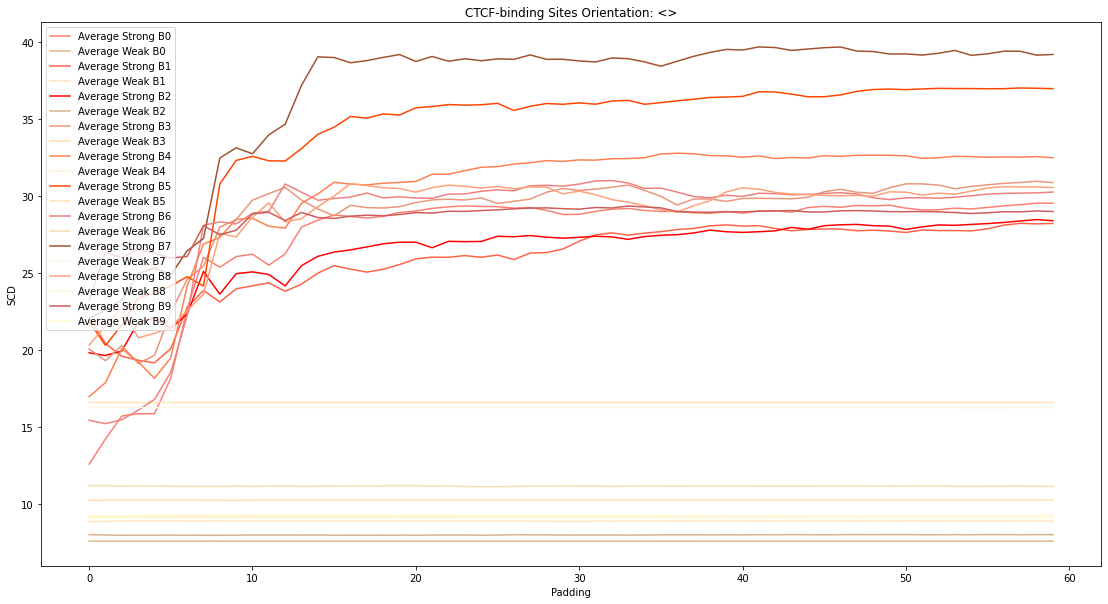

In [42]:
x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(19, 10))

for b in range(nr_bg):
    ax.plot(x, Ave_Strong_d[f"B{b}"], label="Average Strong " + f"B{b}", color=div_strong_colors_10[b])
    ax.plot(x, Ave_Weak_d[f"B{b}"], label="Average Weak " + f"B{b}", color=div_weak_colors_10[b])

ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites Orientation: <>")
ax.legend()
# plt.savefig("./DIVERGENT_Orientation_60paddings_backgrounds.png")
plt.show()

In [43]:
div_Ave_AllStrong = np.zeros(flanks)
div_Ave_AllWeak = np.zeros(flanks)
    
    
for b in range(nr_bg):
    div_Ave_AllStrong += Ave_Strong_d[f"B{b}"]
    div_Ave_AllWeak += Ave_Weak_d[f"B{b}"]

div_Ave_AllStrong = div_Ave_AllStrong / nr_bg
div_Ave_AllWeak = div_Ave_AllWeak / nr_bg

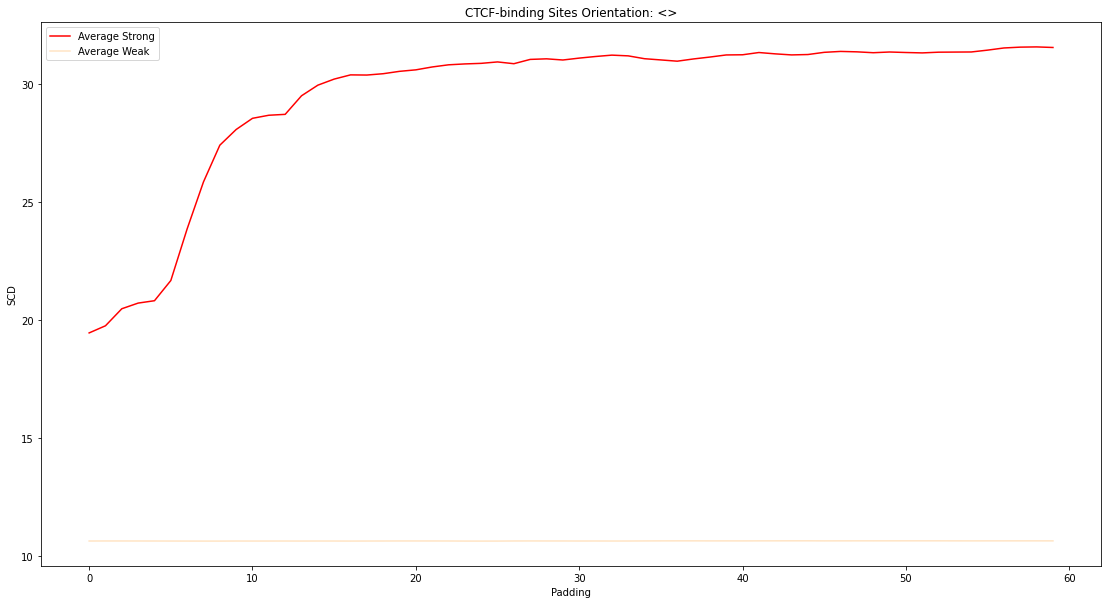

In [44]:
x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(19, 10))

ax.plot(x, div_Ave_AllStrong, label="Average Strong", color="red")
ax.plot(x, div_Ave_AllWeak, label="Average Weak", color="bisque")

ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites Orientation: <>")
ax.legend()
# plt.savefig("./DIVERGENT_Orientation_60paddings_averaged.png")
plt.show()

In [45]:
div_List_of_40 = [np.zeros(60) for i in range(40)]

for b in range(nr_bg):
    for f in range(flanks):
        for k in range(40):
            div_List_of_40[k][f] += df_divergent[f"Pad_{f}_b{b}_SCD"][k]

for k in range(40):
    div_List_of_40[k] = div_List_of_40[k] / nr_bg

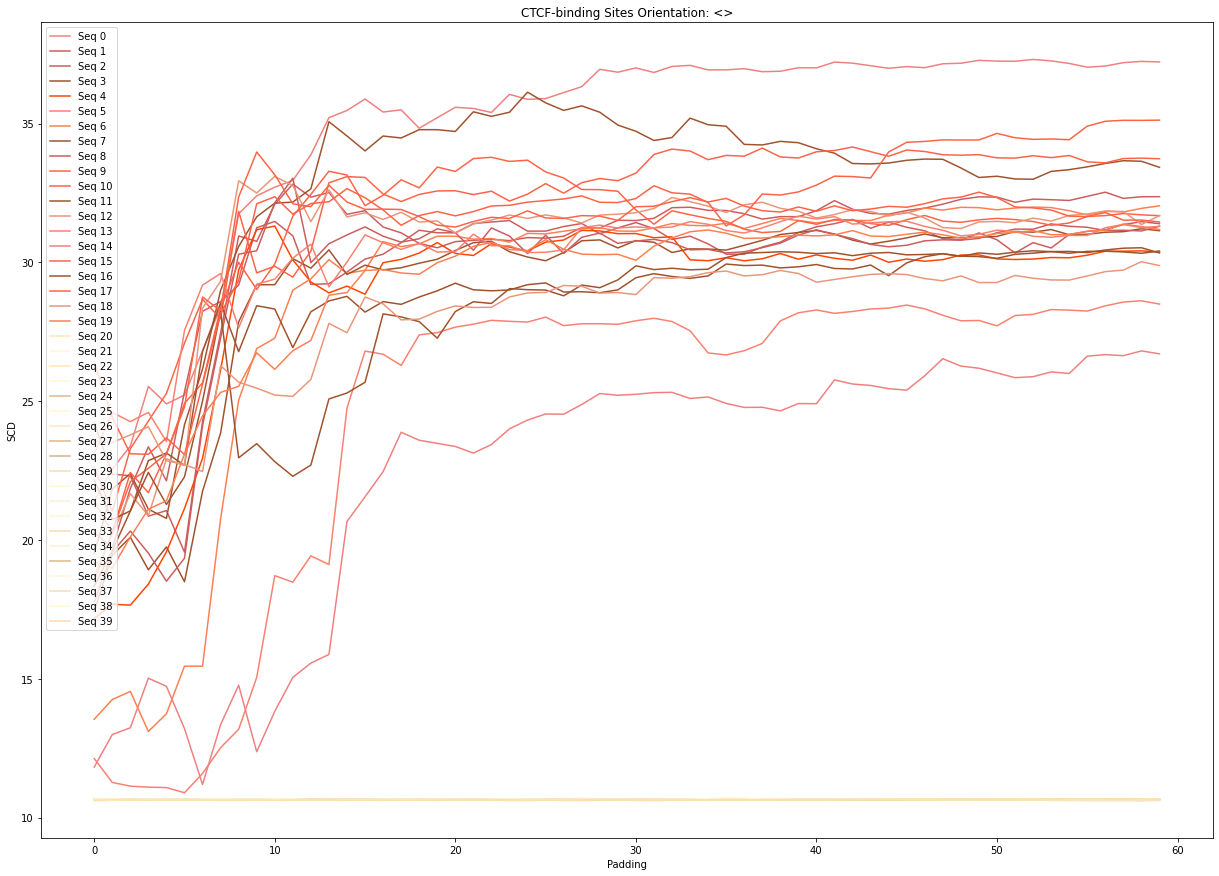

In [50]:
import random

x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(21, 15))

for s in range(40):
    if s < 20:
        ax.plot(x, div_List_of_40[s], label=f"Seq {s}", color=random.choice(div_strong_colors_10))
    else:
        ax.plot(x, div_List_of_40[s], label=f"Seq {s}", color=random.choice(div_weak_colors_10))

ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites Orientation: <>")
ax.legend()
# plt.savefig("./DIVERGENT_Orientation_60paddings_sequences.png")
plt.show()

In [ ]:
##############

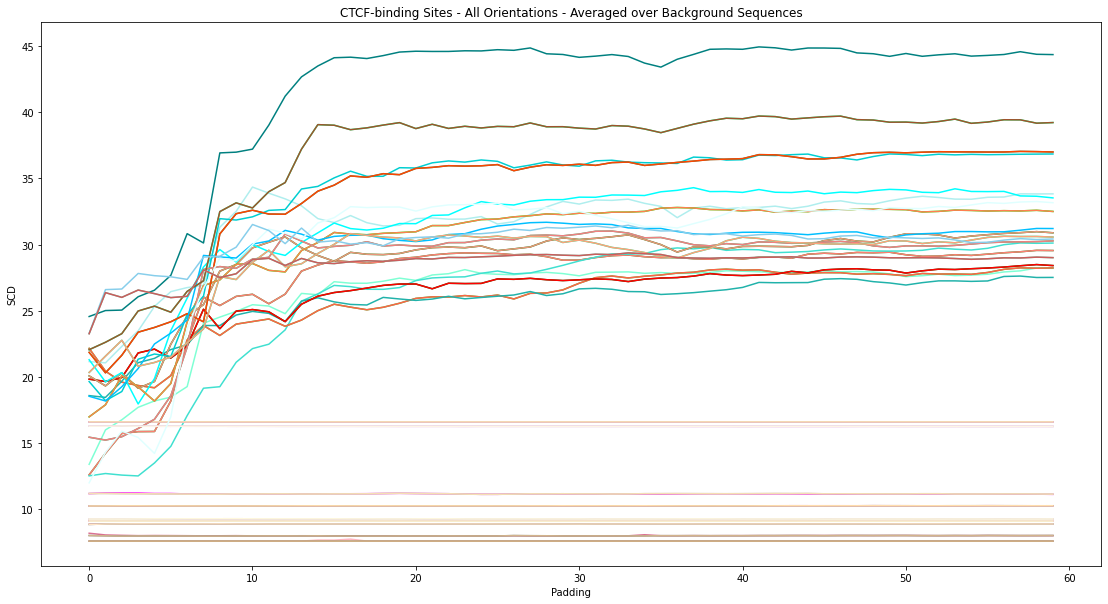

In [57]:
x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(19, 10))

for b in range(nr_bg):
    ax.plot(x, Ave_Strong[f"B{b}"], label="Average Strong " + f"B{b}", color=strong_colors_10[b])
    ax.plot(x, Ave_Weak[f"B{b}"], label="Average Weak " + f"B{b}", color=weak_colors_10[b])
    
    ax.plot(x, Ave_Strong_c[f"B{b}"], label="Average Strong " + f"B{b}", color=con_strong_colors_10[b])
    ax.plot(x, Ave_Weak_c[f"B{b}"], label="Average Weak " + f"B{b}", color=con_weak_colors_10[b])
    
    ax.plot(x, Ave_Strong_d[f"B{b}"], label="Average Strong " + f"B{b}", color=div_strong_colors_10[b])
    ax.plot(x, Ave_Weak_d[f"B{b}"], label="Average Weak " + f"B{b}", color=div_weak_colors_10[b])
    
ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
# ax.set_title("CTCF-binding Sites - All Orientations - Averaged over Background Sequences")
# ax.legend()
plt.savefig("./All_Orientation_60paddings_backgrounds.png")
plt.show()

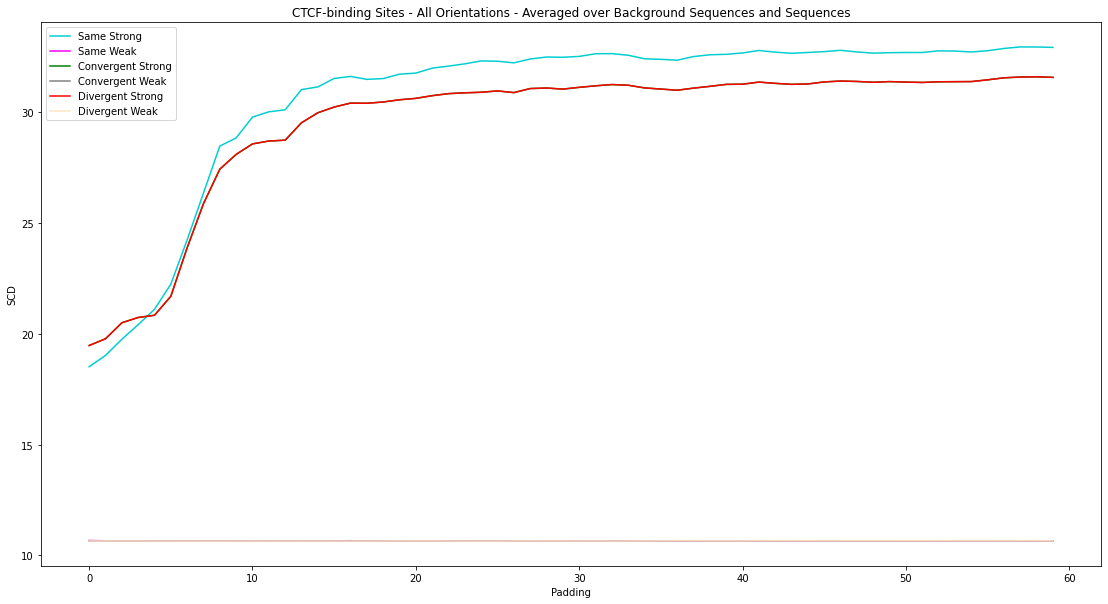

In [56]:
x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(19, 10))

ax.plot(x, Ave_AllStrong, label="Same Strong", color="darkturquoise")
ax.plot(x, Ave_AllWeak, label="Same Weak", color="magenta")

ax.plot(x, con_Ave_AllStrong, label="Convergent Strong", color="green")
ax.plot(x, con_Ave_AllWeak, label="Convergent Weak", color="gray")

ax.plot(x, div_Ave_AllStrong, label="Divergent Strong", color="red")
ax.plot(x, div_Ave_AllWeak, label="Divergent Weak", color="bisque")


ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites - All Orientations - Averaged over Background Sequences and Sequences")
ax.legend()
# plt.savefig("./All_Orientation_60paddings_averaged.png")
plt.show()

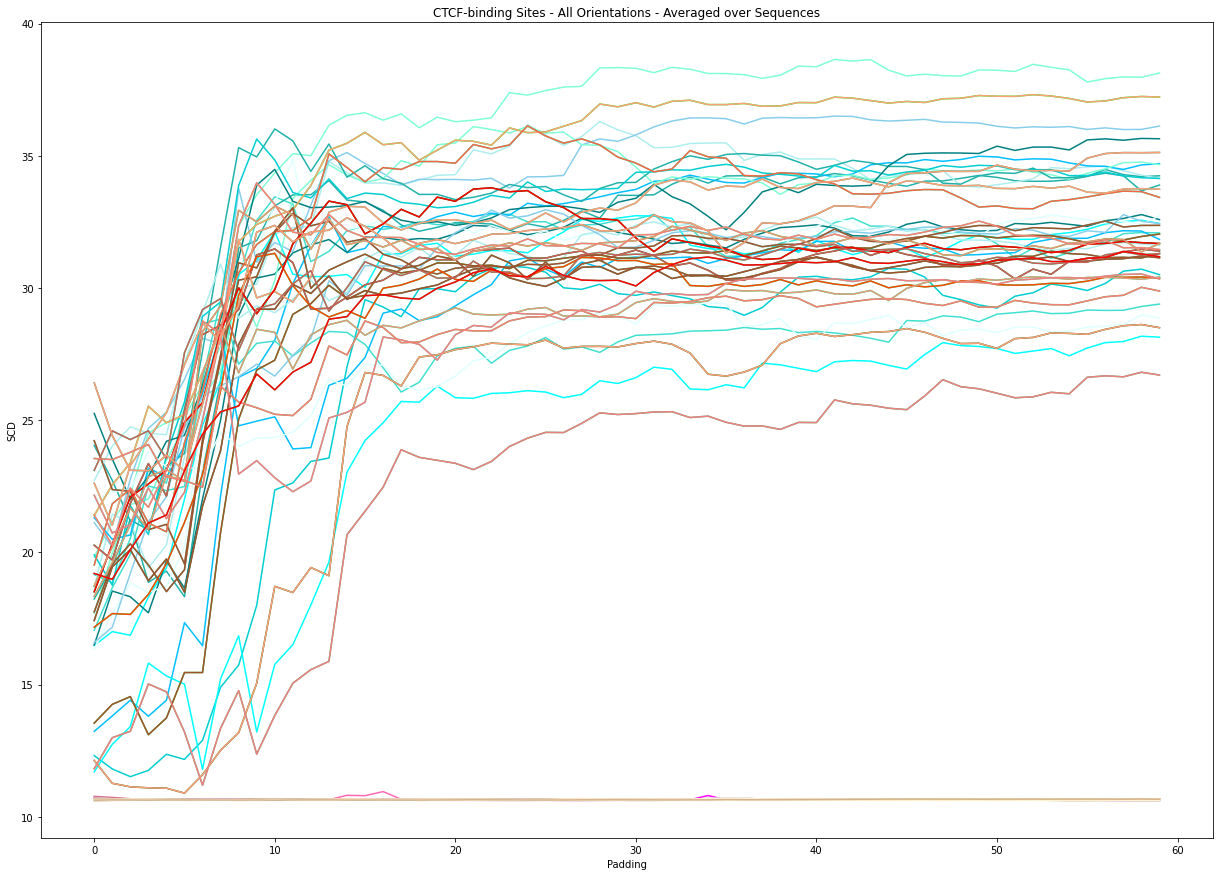

In [58]:

x = [k for k in range(flanks)]

fig, ax = plt.subplots(figsize=(21, 15))

for s in range(40):
    ax.plot(x, List_of_40[s], label=f"Seq {s}", color=colors_all_40[s])

for s in range(40):
    if s < 20:
        ax.plot(x, con_List_of_40[s], label=f"Seq {s}", color=random.choice(con_strong_colors_10))
    else:
        ax.plot(x, con_List_of_40[s], label=f"Seq {s}", color=random.choice(con_weak_colors_10))
    
for s in range(40):
    if s < 20:
        ax.plot(x, div_List_of_40[s], label=f"Seq {s}", color=random.choice(div_strong_colors_10))
    else:
        ax.plot(x, div_List_of_40[s], label=f"Seq {s}", color=random.choice(div_weak_colors_10))
    
ax.set_ylabel("SCD")
ax.set_xlabel("Padding")
ax.set_title("CTCF-binding Sites - All Orientations - Averaged over Sequences")
# ax.legend()
# plt.savefig("./All_Orientation_60paddings_sequences.png")
plt.show()

